In [16]:
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

In [17]:
import gym
from segwey import segwey
from agent import control_agent
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [19]:
agent = control_agent()
agent.env.set_param(discrete_level = 10, max_u = 20)
print("discrete_level", agent.env.discrete_level)
print("max_u", agent.env.max_u)
s = agent.env.reset()
n_actions = agent.env.n_actions
state_dim = agent.env.state_dim
print("action", agent.get_action(s,0))

discrete_level 10
max_u 20
action 6


In [20]:
def R(s, r, u):
    return 1-min(1,0.5*(s[2]-u)**2)
agent.reward = R

In [21]:
U=[]
def u(x):
    return 1
# U.append(u)
def u(x):
    return 0
U.append(u)
def u(x):
    return -1
# U.append(u)

In [22]:
epsilon = agent.epsilon
mean_rewards_loss=np.array([[0,0],[0,0]])
for i in range(1000):
    session_rewards = np.array([agent.generate_session(u=np.random.choice(U),
        epsilon=epsilon, train=True) for _ in range(100)])
    print("epoch #{}\tmean reward = {:.3f}\tloss = {:.3f}\tepsilon = {:.3f}".format(
        i, np.mean(session_rewards[:,0]), np.mean(session_rewards[:,1]), epsilon))
    mean_rewards_loss = np.vstack([mean_rewards_loss,
                                   [np.mean(session_rewards[:,0]), np.mean(session_rewards[:,1])]])
#     epsilon *= 0.99
    assert epsilon >= 1e-4, "Make sure epsilon is always nonzero during training"
#     plt.plot(range(len(mean_rewards)), mean_rewards)
    if np.mean(mean_rewards_loss[-3:,0]) > 700:
        print("You Win!")
        break

epoch #0	mean reward = 11.215	loss = 10.897	epsilon = 0.100
epoch #1	mean reward = 11.142	loss = 33.230	epsilon = 0.100
epoch #2	mean reward = 11.827	loss = 50.131	epsilon = 0.100
epoch #3	mean reward = 12.439	loss = 61.738	epsilon = 0.100
epoch #4	mean reward = 12.008	loss = 64.921	epsilon = 0.100
epoch #5	mean reward = 10.554	loss = 59.082	epsilon = 0.100
epoch #6	mean reward = 11.558	loss = 62.322	epsilon = 0.100
epoch #7	mean reward = 10.157	loss = 57.258	epsilon = 0.100
epoch #8	mean reward = 12.559	loss = 63.507	epsilon = 0.100
epoch #9	mean reward = 11.699	loss = 75.524	epsilon = 0.100
epoch #10	mean reward = 13.696	loss = 82.729	epsilon = 0.100
epoch #11	mean reward = 12.045	loss = 93.970	epsilon = 0.100
epoch #12	mean reward = 10.884	loss = 82.087	epsilon = 0.100
epoch #13	mean reward = 12.161	loss = 90.048	epsilon = 0.100
epoch #14	mean reward = 12.733	loss = 107.126	epsilon = 0.100
epoch #15	mean reward = 13.878	loss = 92.747	epsilon = 0.100
epoch #16	mean reward = 13.861	lo

epoch #132	mean reward = 424.825	loss = 1913.316	epsilon = 0.100
epoch #133	mean reward = 413.709	loss = 1372.719	epsilon = 0.100
epoch #134	mean reward = 447.173	loss = 1646.665	epsilon = 0.100
epoch #135	mean reward = 373.569	loss = 1565.776	epsilon = 0.100
epoch #136	mean reward = 602.146	loss = 849.445	epsilon = 0.100
epoch #137	mean reward = 505.129	loss = 1447.732	epsilon = 0.100
epoch #138	mean reward = 364.369	loss = 1618.413	epsilon = 0.100
epoch #139	mean reward = 709.576	loss = 473.105	epsilon = 0.100
epoch #140	mean reward = 346.766	loss = 251.307	epsilon = 0.100
epoch #141	mean reward = 740.467	loss = 432.617	epsilon = 0.100
epoch #142	mean reward = 757.152	loss = 171.511	epsilon = 0.100
epoch #143	mean reward = 429.692	loss = 959.872	epsilon = 0.100
epoch #144	mean reward = 31.732	loss = 5.259	epsilon = 0.100
epoch #145	mean reward = 75.288	loss = 116.275	epsilon = 0.100
epoch #146	mean reward = 82.484	loss = 438.797	epsilon = 0.100
epoch #147	mean reward = 93.125	loss = 

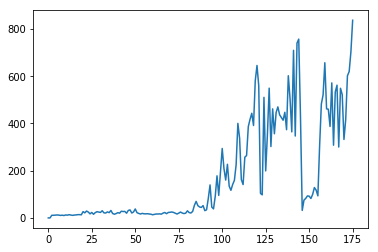

In [23]:
plt.plot(range(len(mean_rewards_loss)), mean_rewards_loss[:,0])

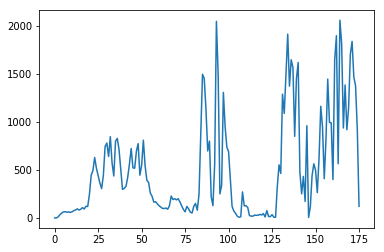

In [24]:
plt.plot(range(len(mean_rewards_loss)), mean_rewards_loss[:,1])

M(x)=-0.514437 D(x)=0.007651
M(phi)=0.000247 D(phi)=0.003374


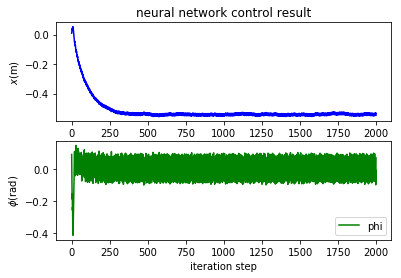

In [25]:
N = 2000
s = agent.env.reset()
X=[]
def f(x): return 0.5
u = f
for t in range(N):
    a = agent.get_action(s,u(t))
    s, r, done, _ = agent.env.step(a)
    X.append(s)
    if done:
        break

X = np.array(X)
x_ = np.mean(X[:,0])
phi_ = np.mean(X[:,1])
dx = np.sum((X[:,0]-x_)**2)/N
dphi = np.sum((X[:,1]-phi_)**2)/N
print("M(x)={:.6f} D(x)={:.6f}".format(x_,dx))
print("M(phi)={:.6f} D(phi)={:.6f}".format(phi_,dphi))

plt.subplot(2, 1, 1)
plt.plot(range(len(X)),X[:,[0]], 'b', label="x")
plt.ylabel('$x$(m)')
plt.title("neural network control result")
plt.subplot(2, 1, 2)
plt.plot(range(len(X)),X[:,[1]], 'g', label="phi")
plt.ylabel('$\phi$(rad)')
plt.xlabel('iteration step')
plt.legend()
plt.savefig("segwey_control.png")

In [26]:
torch.save(agent.network.state_dict(), "segwey_network_control.pt")